In [2]:
import pandas as pd

blood_transfusion =pd.read_csv('../datasets/blood_transfusion.csv')
target_name = 'Class'
data = blood_transfusion.drop(columns=[target_name])
target = blood_transfusion[target_name]

In [3]:
target.value_counts()

Class
not donated    570
donated        178
Name: count, dtype: int64

In [4]:
target.unique()

array(['donated', 'not donated'], dtype=object)

Q1.   
- a) The problem to be solved is a binary classification problem (exactly 2 possible classes)
- d) The proportions of the class counts are imbalanced: some classes have more than twice as many rows than others

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy='most_frequent')
scores = cross_val_score(dummy, data, target, cv=10)
print(
    f"The mean accuracy of the dummy classifier is {scores.mean():.3f} "
    f"+/- {scores.std():.3f}"
)


The mean accuracy of the dummy classifier is 0.762 +/- 0.004


In [7]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dummy, data, target, cv=10)
print(
    f"The mean accuracy is {scores['test_score'].mean():.3f} "
    f" +/- {scores['test_score'].std():.3f}"
)


The mean accuracy is 0.762  +/- 0.004


Q2. c) ~75%

In [11]:
balanced_accuracy = cross_validate(
    dummy,
    data,
    target, 
    cv=10,
    scoring='balanced_accuracy',
)

print(
    f"The mean balanced accuracy is {balanced_accuracy['test_score'].mean():.3f}"
    f" +/- {balanced_accuracy['test_score'].std():.3f}"
)

The mean balanced accuracy is 0.500 +/- 0.000


Q3. b) ~0.5

Q4. a)faster to compute the list of neighbors on scaled data

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=1)
)

In [14]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

Q5. c) 5

In [18]:
scores = cross_validate(
    model,
    data,
    target,
    cv=10,
    scoring='balanced_accuracy',
    return_train_score=True,
)

print(
    f"The mean balanced accuracy is {scores['test_score'].mean():.3f} "
    f" +/- {scores['test_score'].std():.3f}\n"
    f"The mean training score is {scores['train_score'].mean():.3f} "
    f" +/- {scores['train_score'].std():.3f}"
)

The mean balanced accuracy is 0.553  +/- 0.082
The mean training score is 0.694  +/- 0.010


Q6. a)

In [19]:
import numpy as np

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

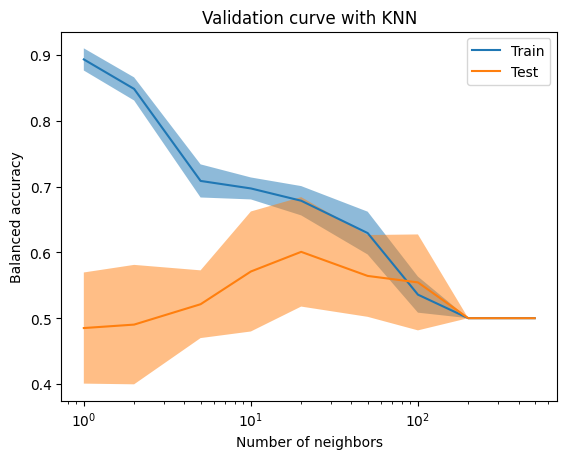

In [26]:
from sklearn.model_selection import ValidationCurveDisplay 

display = ValidationCurveDisplay.from_estimator(
    model,
    data, 
    target, 
    param_name='kneighborsclassifier__n_neighbors',
    param_range=param_range,
    scoring='balanced_accuracy',
    std_display_style='fill_between',
    n_jobs=-1
)

__ = display.ax_.set(
    title='Validation curve with KNN',
    xlabel='Number of neighbors',
    ylabel='Balanced accuracy',
)


a) The model underfits for a range of n_neighbors values between 1 to 10


c) The model overfits for a range of n_neighbors values between 100 to 500



b) The model best generalizes for a range of n_neighbors values between 10 to 100